In [3]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib notebook

In [16]:
data = load_iris(as_frame=True)['frame']

In [23]:
data['response'] = np.random.random(150)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,response
0,5.1,3.5,1.4,0.2,0,0.752107
1,4.9,3.0,1.4,0.2,0,0.700270
2,4.7,3.2,1.3,0.2,0,0.276186
3,4.6,3.1,1.5,0.2,0,0.327649
4,5.0,3.6,1.4,0.2,0,0.189155
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.343421
146,6.3,2.5,5.0,1.9,2,0.060867
147,6.5,3.0,5.2,2.0,2,0.136460
148,6.2,3.4,5.4,2.3,2,0.124772


In [24]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,response
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561,-0.035415
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658,0.030854
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035,-0.055681
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547,-0.066768
target,0.782561,-0.426658,0.949035,0.956547,1.000000,-0.039863
response,-0.035415,0.030854,-0.055681,-0.066768,-0.039863,1.000000


<IPython.core.display.Javascript object>


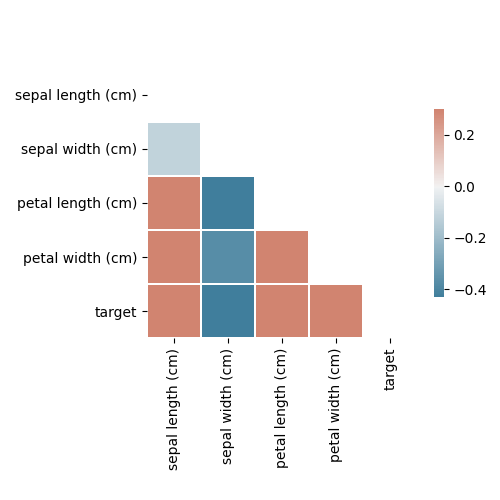

In [21]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(5,5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

fig.tight_layout()
fig.show()

### Reasonable steps

#### 1. check which individual features correspond most strongly with response
 - correlation (pearson and spearman)

#### 2. perform MRMR algorithm to select and investigate uncorrelated features

#### 3. build a elastic-net regression model based on subset of features (~10) to balance to number of samples
 - change in tumour volume (MRI)
 - change in tumour volume (PET)
 - change in ADC (mean, max, median, variance)
 - other features